# Imports

In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import seaborn as sns
import optuna

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Helper Functions

In [27]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [3]:
df = pd.read_csv('../../data/Clusterizacao/X_dataset.csv')

# Machine Learning Models

## KMEANS

In [29]:
k_values = np.arange(2,30,1)
sil_list = []

for i in k_values:
    labels = KMeans(n_clusters=i).fit_predict(df)
    #model.fit(df)

    sil_list.append(silhouette_score(df, labels) )




<Axes: >

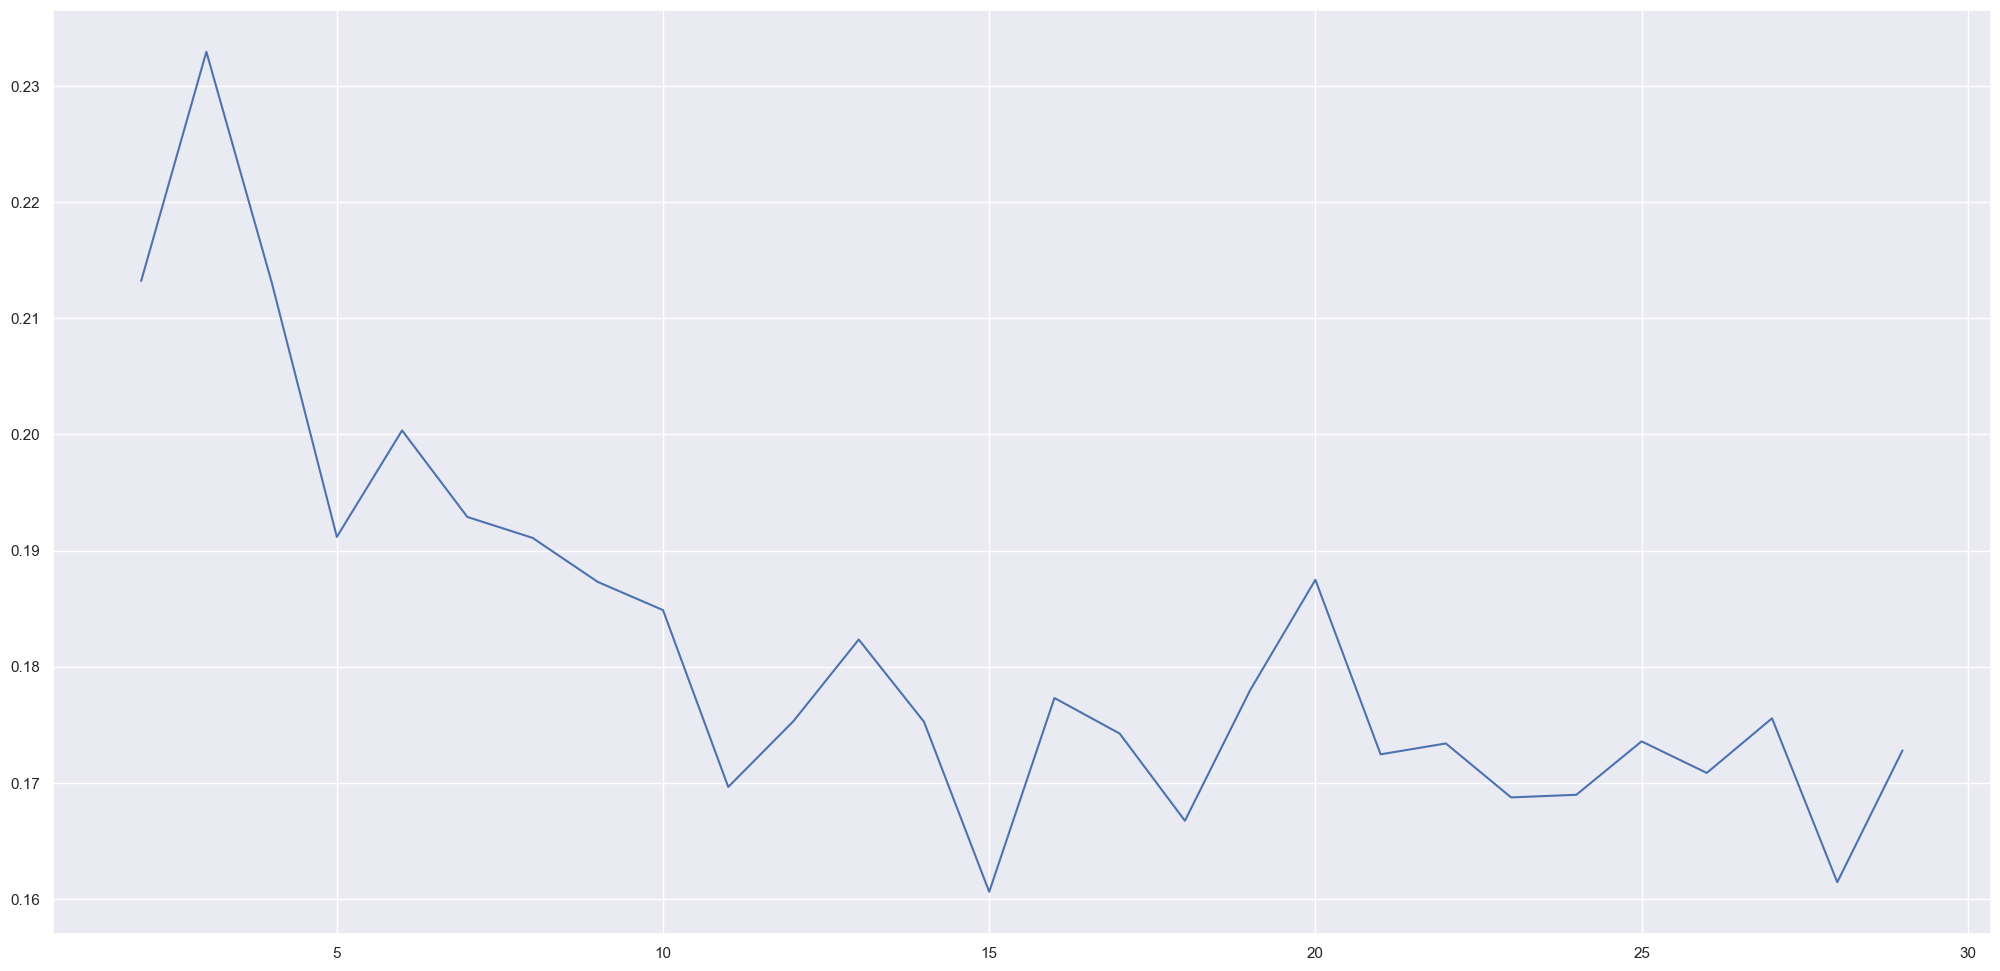

In [30]:
sns.lineplot(x=k_values, y=sil_list)